In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import scipy as sci
import matplotlib
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
import hdbscan
from fcmeans import FCM

import analysis as ana
import plot as pl

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

In [4]:
brain_data_z, cog_data_z, subj_data = ana.load_data('../data_zscore')
data_z_all = cog_data_z.join(brain_data_z)
brain_data_q, cog_data_q, subj_data = ana.load_data('../data_quant')

# ICA

In [237]:
from sklearn.decomposition import FastICA

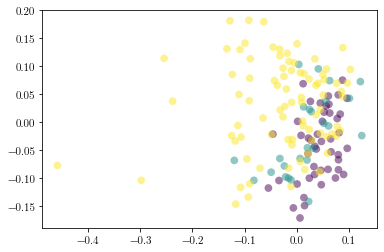

In [411]:
transformer = FastICA(n_components=2, random_state=0, whiten='svd') #unit-variance
cog_data_z_ica = transformer.fit_transform(all_data_z_pcafa)

plt.scatter(cog_data_z_ica[:,0], cog_data_z_ica[:,1], c=subj_data['phenotype_description'], s=60, lw=0, alpha=0.5)

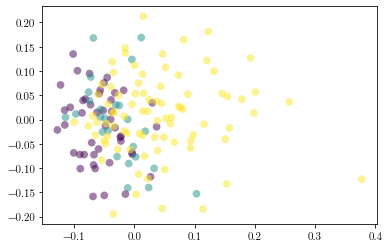

In [420]:
transformer = FastICA(n_components=2, random_state=0, whiten='svd') #unit-variance
cog_data_z_ica = transformer.fit_transform(data_z_pca)

plt.scatter(cog_data_z_ica[:,0], cog_data_z_ica[:,1], c=subj_data['phenotype_description'], s=60, lw=0, alpha=0.5)

# PCA

In [5]:
pca = PCA(6)
pca.fit_transform(cog_data_z)
components = pca.components_
cog_data_z_pca = pca.transform(cog_data_z) # project the original data into the PCA space

In [6]:
pca = PCA(4)
pca.fit(brain_data_z)
components = pca.components_
brain_data_z_pca = pca.transform(brain_data_z)

In [7]:
pca = PCA(9)
pca.fit_transform(data_z_all)
components = pca.components_
data_z_pca = pca.transform(data_z_all)

In [8]:
pca = PCA(7)
pca.fit_transform(cog_data_q)
components = pca.components_
cog_data_q_pca = pca.transform(cog_data_q)

In [9]:
pca = PCA(7)
pca.fit_transform(brain_data_q)
components = pca.components_
brain_data_q_pca = pca.transform(brain_data_q)

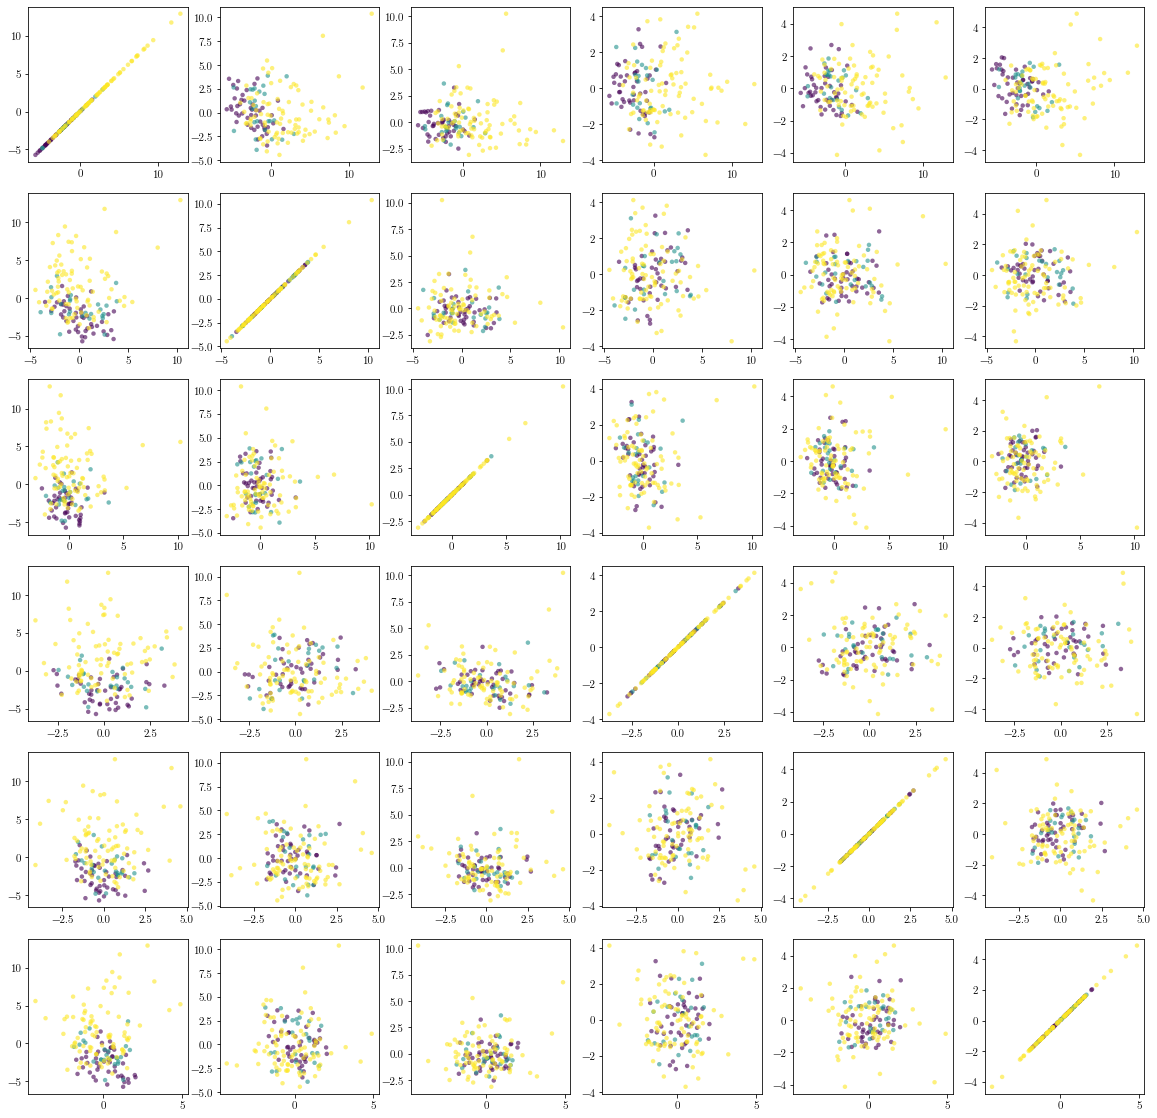

In [10]:
fig, ax = plt.subplots(6,6, figsize=(20,20))
f=0
for i in range(6):
    for j in range(6):
        ax.flatten()[f].scatter(cog_data_z_pca[:,i], cog_data_z_pca[:,j], 
                             c=subj_data['phenotype_description'], alpha=0.6, s=20, lw=0)
        f+=1

# FA

In [10]:
brain_data_z_m = brain_data_z.drop(['23', '24', '28'], axis=1)
fa = FactorAnalyzer(7, rotation=None)
fa.fit(brain_data_z_m)
brain_data_z_fa = fa.transform(brain_data_z_m)

In [235]:
cog_data_z_ = cog_data_z.drop(['deldisk01_auc_40000', 'er4001_er40_c_fpa'], axis=1)
fa = FactorAnalyzer(13, rotation=None)
fa.fit(cog_data_z_)
cog_data_z_fa = fa.transform(cog_data_z_)

In [437]:
fa = FactorAnalyzer(13, rotation=None)
fa.fit(cog_data_q)
cog_data_q_fa = fa.transform(cog_data_q)

In [439]:
fa = FactorAnalyzer(8, rotation=None)
fa.fit(brain_data_q)
brain_data_q_fa = fa.transform(brain_data_q)

### combined

In [11]:
all_data_z_pcafa = np.concatenate((cog_data_z_pca, brain_data_z_fa), axis=1)
all_data_z_pcafa.shape

(155, 13)

## scipy.cluster.hierarchy.linkage

In [300]:
z = shc.linkage(cog_data_z_ica, method='ward',
                metric='euclidean', optimal_ordering=False)

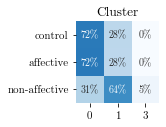

In [303]:
k = 3
HC = sci.cluster.hierarchy.cut_tree(z, n_clusters=k)
df = ana.calculate_cluster_stats(HC)
pl.plot_cluster_result(df, k)

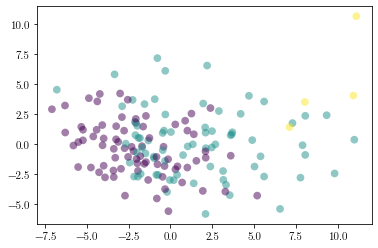

In [304]:
plt.scatter(data_z_pca[:,0], data_z_pca[:,1], c=HC, s=60, lw=0, alpha=0.5)

## Fuzzy Clustering

In [485]:
from fcmeans import FCM

In [503]:
pca = PCA(6)
pca.fit_transform(cog_data_z)
components = pca.components_
cog_data_z_pca = pca.transform(cog_data_z)

brain_data_z_m = brain_data_z.drop(['23', '24', '28'], axis=1)
fa = FactorAnalyzer(10, rotation=None)
fa.fit(brain_data_z_m)
brain_data_z_fa = fa.transform(brain_data_z_m)

all_data_z_pcafa = np.concatenate((cog_data_z_pca, brain_data_z_fa), axis=1)
all_data_z_pcafa.shape

(155, 16)

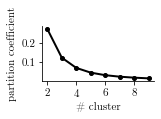

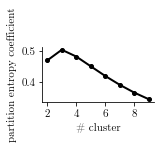

In [504]:
K, pc_list, pec_list = ana.get_partition(all_data_z_pcafa, 9)
pl.plot_clustering_validation(K, pc_list, 'partition coefficient')
pl.plot_clustering_validation(K, pec_list, 'partition entropy coefficient')

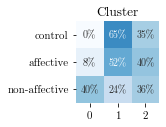

In [498]:
k = 3
predict_all, df = ana.Fuzzy(all_data_z_pcafa, k)
pl.plot_cluster_result(df, k)

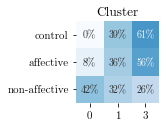

In [446]:
k = 3
data = cog_data_z_pca

my_model = FCM(n_clusters=k) 
my_model.fit(data) 
centers = my_model.centers
labels = my_model.predict(data)

df = ana.calculate_cluster_stats(labels)
pl.plot_cluster_result(df, k)

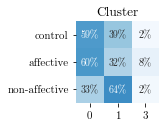

In [451]:
k = 3
data = brain_data_z_fa

my_model = FCM(n_clusters=k) 
my_model.fit(data) 
centers = my_model.centers
labels = my_model.predict(data)

df = ana.calculate_cluster_stats(labels)
pl.plot_cluster_result(df, k)

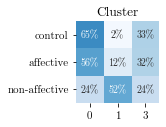

In [448]:
k = 3
data = all_data_z_pcafa

my_model = FCM(n_clusters=k) 
my_model.fit(data) 
centers = my_model.centers
labels = my_model.predict(data)

df = ana.calculate_cluster_stats(labels)
pl.plot_cluster_result(df, k)

In [452]:
import skfda

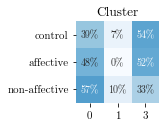

In [483]:
k = 3
fd = skfda.FDataGrid(all_data_z_pcafa)
fuzzy_kmeans = skfda.ml.clustering.FuzzyCMeans(n_clusters=k, fuzzifier=2)
labels = fuzzy_kmeans.fit_predict(fd)

df = ana.calculate_cluster_stats(labels)
pl.plot_cluster_result(df, k)

## DBSCAN

In [172]:
from sklearn.cluster import DBSCAN

In [315]:
for eps in [0.1, 0.5, 1,2,3,4,5,6,7,8]:
    for min_s in [1,2,3,4,5,6,7,8,10,13,15,18,20]:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(cog_data_z_ica)
        labels = db.labels_
        print(eps, min_s, labels)

0.1 1 [ 0  1  1  1  1  1  1  2  1  3  4  5  6  7  1  1  8  1  9  1 10  1 11  1
 12  1 13  1  0  1 14  1  1  1  1  1  1  1  1  1  1  1 15  1 16  1 17  1
  1  1  1  1  1 18  1  1  1 19 20 21 22 23  1  1 24 13 25 26  4  2 27  1
 28  1 29  1  1  1  1 30 31  5  1 32 33 34 35 19 36 18 37 38  1 39 40 41
 42 43 44  1 45 46 47 48 49 50 51 52 53 54 18  8 45 55 45  1 56  1  1 57
 58 59 24 60 17 61 62 63 64 65  1  1 66 67  1 68 69 70 18 71 72 73 74  1
 75  1 76 77 78 19 79 80 81 82  1]
0.1 2 [ 0  1  1  1  1  1  1  2  1 -1  3  4 -1 -1  1  1  5  1 -1  1 -1  1 -1  1
 -1  1  6  1  0  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  7  1
  1  1  1  1  1  8  1  1  1  9 -1 -1 -1 -1  1  1 10  6 -1 -1  3  2 -1  1
 -1  1 -1  1  1  1  1 -1 -1  4  1 -1 -1 -1 -1  9 -1  8 -1 -1  1 -1 -1 -1
 -1 -1 -1  1 11 -1 -1 -1 -1 -1 -1 -1 -1 -1  8  5 11 -1 11  1 -1  1  1 -1
 -1 -1 10 -1  7 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  8 -1 -1 -1 -1  1
 -1  1 -1 -1 -1  9 -1 -1 -1 -1  1]
0.1 3 [-1  0  0  0  0  0  0 -1  0 -1 -1 -1

In [326]:
db = DBSCAN(eps=0.6, min_samples=15).fit(cog_data_z_ica)
labels = db.labels_
print(eps, min_s, labels)

8 20 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


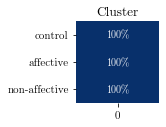

In [327]:
df = ana.calculate_cluster_stats(labels)
pl.plot_cluster_result(df, db.labels_.max())

## HDBSCAN

In [121]:
import hdbscan

In [346]:
k = 3
clusterer = hdbscan.HDBSCAN(min_cluster_size=k, metric='euclidean', 
                            alpha=5., leaf_size=5,
                            approx_min_span_tree=False)
results = clusterer.fit(cog_data_z_ica)
labels = results.labels_

In [347]:
labels

array([ 1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  0, -1,  1, -1, -1,
       -1,  1,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1, -1, -1, -1,  0,  1, -1,  1, -1, -1,  1,  1, -1, -1, -1,
       -1,  1])

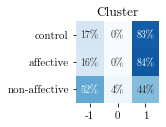

In [348]:
df = ana.calculate_cluster_stats(labels)
pl.plot_cluster_result(df, clusterer.labels_.max())